In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"xlf.csv", encoding="utf-8", header=1)
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44


In [3]:
# get average Index Weight

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Symbol         71 non-null     object 
 1   Company Name   71 non-null     object 
 2   Index Weight   71 non-null     object 
 3   Last           71 non-null     float64
 4   Change         71 non-null     float64
 5   %Change        71 non-null     object 
 6   Volume         71 non-null     object 
 7   52 Week Range  71 non-null     object 
dtypes: float64(2), object(6)
memory usage: 4.6+ KB


In [5]:
# answer

df["IW"] = df["Index Weight"].apply(lambda x: float(x.strip("%")))
average_iw = round(df["IW"].mean(), 2)
average_iw

1.41

In [6]:
# solution

df["IW"] = df["Index Weight"].str.strip("%").astype(float)

In [7]:
# plot as a pie top 5 companies by Volume

array([<Axes: >], dtype=object)

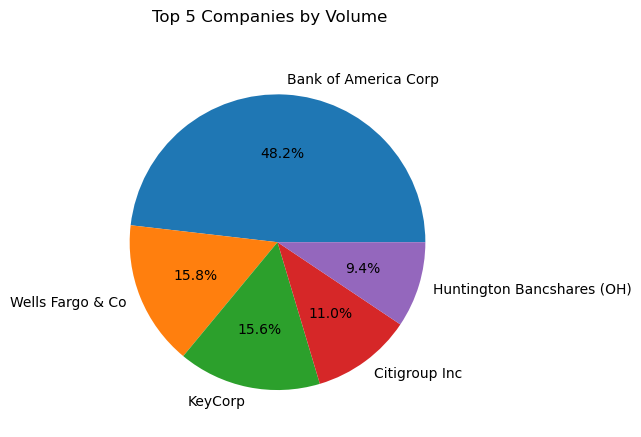

In [33]:
df["V"] = df["Volume"].str.strip("M").astype(float)
top_5 = df.nlargest(5, "V")[["Company Name", "V"]]
top_5.set_index("Company Name", inplace=True)
top_5.plot.pie(subplots=True, autopct = "%1.1f%%", legend=False, ylabel="", title="Top 5 Companies by Volume")

In [9]:
# what is the last price of company symbol: JPM

In [10]:
df[df["Symbol"] == "JPM"]

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V
1,JPM,JP Morgan Chase & Co,10.09%,220.3,-4.5,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96


In [11]:
top_banks = ["JPM", "C", "BAC"]
df.query("Symbol in @top_banks")

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49
12,C,Citigroup Inc,1.87%,61.46,-1.18,-1.88%,11.06 M,38.17 - 67.81,1.87,11.06


In [12]:
# get the difference between high and low

In [13]:
# solution

df[["Low", "High"]] = df["52 Week Range"].str.split(" - ", expand=True).astype(float)
df["Difference"] = df["High"] - df["Low"]
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V,Low,High,Difference
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89,13.76,7.51,330.58,482.89,152.31
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96,135.19,225.48,90.29
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96,6.99,7.28,227.78,290.96,63.18
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00,6.31,2.06,359.77,490.00,130.23
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49,24.96,44.44,19.48


In [14]:
# use apply and lambda, if last price is lower than 100, return buy, else sell
# save results in the new col "Advice"

In [15]:
df["Advice 1"] = df["Last"].apply(lambda x: "buy" if x < 100 else "sell")
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V,Low,High,Difference,Advice 1
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89,13.76,7.51,330.58,482.89,152.31,sell
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96,135.19,225.48,90.29,sell
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96,6.99,7.28,227.78,290.96,63.18,sell
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00,6.31,2.06,359.77,490.00,130.23,sell
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49,24.96,44.44,19.48,buy


In [16]:
# do the same this time using np.where

In [17]:
help(np.where)

Help on function where in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called when x an

In [18]:
df["Advice 2"] = np.where(df["Last"] < 100, "buy", "sell")
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V,Low,High,Difference,Advice 1,Advice 2
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89,13.76,7.51,330.58,482.89,152.31,sell,sell
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96,135.19,225.48,90.29,sell,sell
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96,6.99,7.28,227.78,290.96,63.18,sell,sell
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00,6.31,2.06,359.77,490.00,130.23,sell,sell
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49,24.96,44.44,19.48,buy,buy


In [19]:
# do the same with method loc

In [20]:
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [34]:
df.loc[df["Last"] < 100, "Advice 3"] = "buy"
df.loc[df["Last"] >= 100, "Advice 3"] = "sell"
df.head()

,Symbol,Company Name,Index Weight,Last,Change,%Change,Volume,52 Week Range,IW,V,Low,High,Difference,Advice 1,Advice 2,Advice 3
0,BRK.b,Berkshire Hathaway B,13.76%,476.83,0.91,+0.19%,7.51 M,330.58 - 482.89,13.76,7.51,330.58,482.89,152.31,sell,sell,sell
1,JPM,JP Morgan Chase & Co,10.09%,220.30,-4.50,-2.00%,8.96 M,135.19 - 225.48,10.09,8.96,135.19,225.48,90.29,sell,sell,sell
2,V,Visa Inc A,6.99%,278.54,2.17,+0.79%,7.28 M,227.78 - 290.96,6.99,7.28,227.78,290.96,63.18,sell,sell,sell
3,MA,Mastercard Inc A,6.31%,482.12,-1.22,-0.25%,2.06 M,359.77 - 490.00,6.31,2.06,359.77,490.00,130.23,sell,sell,sell
4,BAC,Bank of America Corp,4.41%,40.70,-0.05,-0.12%,48.49 M,24.96 - 44.44,4.41,48.49,24.96,44.44,19.48,buy,buy,buy
